In [1]:
# Implementing random forest model using processed data 

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn
import numpy as np

In [3]:
dataset = pd.read_csv("KNNImputedFeatureMat.csv")

# importing dataset, which includes imputed data points

In [4]:
dataset.head()

,Unnamed: 0,SUBJECT_ID_x,HADM_ID,50817,50893,50904,50906,50907,50912,51006,...,CHARTTIME,diagnosis,procedure,deceased,ADMITTIME,DISCHTIME,DEATHTIME,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,0,26151.0,198467.0,312.5,16.80,61.0,68.0,178.0,1.0,16.0,...,2172-03-14 11:00:00,V3000,9604.0,0,2172-03-14 01:15:00,2172-05-11 13:10:00,NaN,WHITE,0,1
1,1,26156.0,184187.0,76.0,16.60,64.0,68.0,179.5,1.7,94.0,...,2172-03-14 13:00:00,V3000,9604.0,0,2172-03-14 01:15:00,2172-05-11 13:10:00,NaN,WHITE,0,1
2,2,26159.0,181374.0,174.5,9.10,41.5,68.0,171.5,1.7,130.0,...,2172-03-14 15:00:00,V3000,9604.0,0,2172-03-14 01:15:00,2172-05-11 13:10:00,NaN,WHITE,0,1
3,3,26162.0,153433.0,145.0,12.00,56.0,68.0,157.5,0.8,13.0,...,2172-03-14 17:00:00,V3000,9604.0,0,2172-03-14 01:15:00,2172-05-11 13:10:00,NaN,WHITE,0,1
4,4,26168.0,195015.0,215.0,41.25,61.0,68.0,178.0,0.2,13.0,...,2172-03-14 19:00:00,V3000,9604.0,0,2172-03-14 01:15:00,2172-05-11 13:10:00,NaN,WHITE,0,1


In [5]:
dataset.columns 

Index(['Unnamed: 0', 'SUBJECT_ID_x', 'HADM_ID', '50817', '50893', '50904',
       '50906', '50907', '50912', '51006', '51108', '51237', '51265', '51279',
       '51300', 'Unnamed: 0_y', 'CHARTTIME', 'diagnosis', 'procedure',
       'deceased', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ETHNICITY',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [6]:
dataset = dataset.drop(columns = ["Unnamed: 0", "Unnamed: 0_y", "HOSPITAL_EXPIRE_FLAG", "HAS_CHARTEVENTS_DATA", "CHARTTIME", "ADMITTIME", "DISCHTIME", "DEATHTIME"])
# data selection

In [7]:
dataset.head()

,SUBJECT_ID_x,HADM_ID,50817,50893,50904,50906,50907,50912,51006,51108,51237,51265,51279,51300,diagnosis,procedure,deceased,ETHNICITY
0,26151.0,198467.0,312.5,16.80,61.0,68.0,178.0,1.0,16.0,1800.0,1.90,383.0,6.76,16.1,V3000,9604.0,0,WHITE
1,26156.0,184187.0,76.0,16.60,64.0,68.0,179.5,1.7,94.0,1800.0,4.10,210.0,3.87,16.1,V3000,9604.0,0,WHITE
2,26159.0,181374.0,174.5,9.10,41.5,68.0,171.5,1.7,130.0,1800.0,8.35,1228.0,3.98,16.1,V3000,9604.0,0,WHITE
3,26162.0,153433.0,145.0,12.00,56.0,68.0,157.5,0.8,13.0,1800.0,1.30,245.0,3.00,16.1,V3000,9604.0,0,WHITE
4,26168.0,195015.0,215.0,41.25,61.0,68.0,178.0,0.2,13.0,1800.0,3.95,472.0,4.10,16.1,V3000,9604.0,0,WHITE


In [17]:
dataset["deceased"].unique()

array([0])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(dataset.drop(["SUBJECT_ID_x", "HADM_ID", "diagnosis", "procedure", "deceased", "ETHNICITY"], axis = "columns"), dataset["deceased"], test_size = 0.25)

# creating train/test cohorts for model creation



In [10]:
len(x_train)

90

In [11]:
model = RandomForestClassifier()

# creating random forest model

In [12]:
model.fit(x_train, y_train)

/Users/kaushalrao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
model.score(x_test, y_test)

1.0

In [14]:
y_predicted = model.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [16]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[31]])

Text(69.0, 0.5, 'Truth')

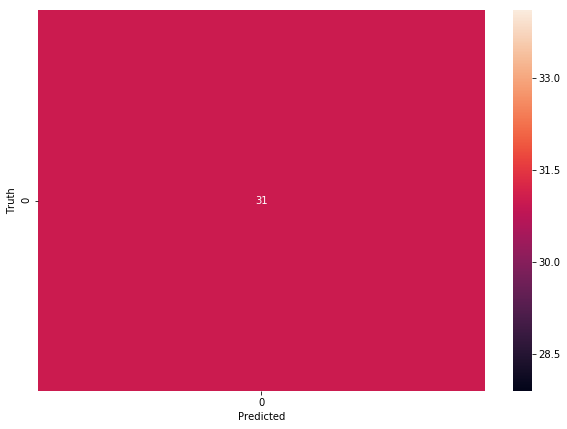

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")